In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [9]:
print("###################Task 1###################")


###################Task 1###################


###################Task 3###################
Part a


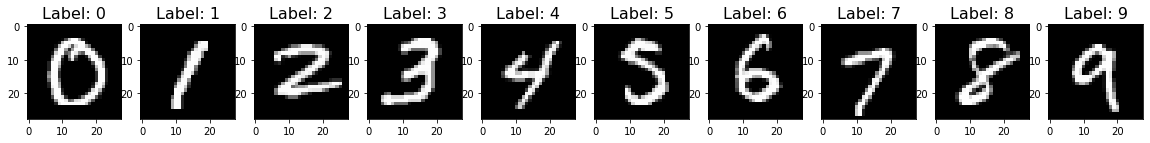

In [10]:
print("###################Task 3###################")
tf.random.set_seed(11)

print("Part a")

(x_train_03, y_train_03), (x_test_03, y_test_03) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

# Visualize the data
f, ax = plt.subplots(1, 10, figsize=(20, 20))

for i in range(0, 10):
    sample = x_train_03[y_train_03 == i][11]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Label: {}".format(i), fontsize=16)

# plt.show()

# Scale the data
scaler = MinMaxScaler()
x_train_03 = scaler.fit_transform(x_train_03.reshape(-1, x_train_03.shape[-1])).reshape(x_train_03.shape)
x_test_03 = scaler.transform(x_test_03.reshape(-1, x_test_03.shape[-1])).reshape(x_test_03.shape)

In [11]:
print("Part b")
# Create Neural Network
model_b = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_b.fit(x_train_03, y_train_03, epochs=5)

# The training accuracy is 0.9649
val_loss_b, val_acc_b = model_b.evaluate(x_test_03, y_test_03)
print("Accuracy for test set:", val_acc_b)
# The test accuracy is 0.9621

Part b
Epoch 1/5
1875/1875 [==============================] - 1s 423us/step - loss: 0.3641 - accuracy: 0.8980
Epoch 2/5
1875/1875 [==============================] - 1s 433us/step - loss: 0.2074 - accuracy: 0.9401
Epoch 3/5
1875/1875 [==============================] - 1s 422us/step - loss: 0.1634 - accuracy: 0.9524
Epoch 4/5
1875/1875 [==============================] - 1s 417us/step - loss: 0.1369 - accuracy: 0.9605
Epoch 5/5
313/313 [==============================] - 0s 356us/step - loss: 0.1281 - accuracy: 0.9621
Accuracy for test set: 0.9621000289916992


In [12]:
print("Part c")
# Improve the model
model_c = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_3 = model_c.fit(x_train_03, y_train_03, epochs=5)

# The training accuracy is 0.9870

val_loss_c, val_acc_c = model_c.evaluate(x_test_03, y_test_03)
print("Accuracy for test set:", val_acc_c)

# The test accuracy is 0.9736
# The accuracy of the deeper model is more accurat than the other one
# On the other hand it needs more data and is much more slower

Part c
Epoch 1/5
1875/1875 [==============================] - 1s 666us/step - loss: 0.2105 - accuracy: 0.9373
Epoch 2/5
1875/1875 [==============================] - 1s 654us/step - loss: 0.0906 - accuracy: 0.9722
Epoch 3/5
1875/1875 [==============================] - 1s 644us/step - loss: 0.0656 - accuracy: 0.9803
Epoch 4/5
1875/1875 [==============================] - 1s 648us/step - loss: 0.0498 - accuracy: 0.9834
Epoch 5/5
313/313 [==============================] - 0s 442us/step - loss: 0.1012 - accuracy: 0.9747
Accuracy for test set: 0.9746999740600586


Part d


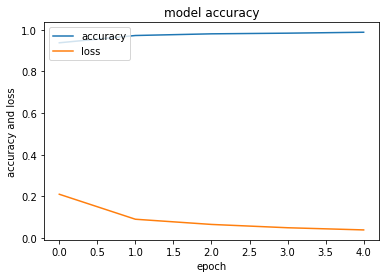

In [13]:
print("Part d")

plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [7]:
print("###################Task 4###################")
(x_train_04, y_train_04), (x_test_04, y_test_04) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

# Scale the data
scaler = MinMaxScaler()
x_train_04 = scaler.fit_transform(x_train_04.reshape(-1, x_train_04.shape[-1])).reshape(x_train_04.shape)
x_test_04 = scaler.transform(x_test_04.reshape(-1, x_test_04.shape[-1])).reshape(x_test_04.shape)

print("Part a and b")
# Improve the model
model_4a = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])
model_4a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_4a.fit(x_train_04, y_train_04, epochs=5)

# The training accuracy is 0.9858

val_loss_4, val_acc_4 = model_4a.evaluate(x_test_04, y_test_04)
print("Accuracy for test set:", val_acc_4)

# The test accuracy is 0.9767
# The dropout rate defines how many neurons are eliminated in each layer
# With dropout in a nn overfitting can be minimized

###################Task 4###################
Part a and b
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2555 - accuracy: 0.9243

In [8]:
print("Part c")
model_4c = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(10, activation='softmax')
])
model_4c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_4c.fit(x_train_04, y_train_04, epochs=5)

# The training accuracy with BatchNormalization is 0.9742

val_loss_4c, val_acc_4c = model_4c.evaluate(x_test_04, y_test_04)
print("Accuracy for test set:", val_acc_4c)
# The test accuracy with BatchNormalization is 0.9782

# Batch normalization applies a transformation that maintains the mean output
# close to 0 and the output standard deviation close to 1

Part c
Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2841 - accuracy: 0.9151

In [29]:
print("Part d")
model_4d = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu', kernel_regularizer='l1'),
    BatchNormalization(),
    Dense(128, activation='relu', kernel_regularizer='l1'),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_regularizer='l1'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(10, activation='softmax')
])
model_4d.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_4 = model_4d.fit(x_train_04, y_train_04, epochs=5)
# The training accuracy with l1-regularizer is 0.8869

val_loss_4d, val_acc_4d = model_4d.evaluate(x_test_04, y_test_04)
print("Accuracy for test set:", val_acc_4d)
# The test accuracy with l1-regularizer is 0.8876

Part d
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 5.7485 - accuracy: 0.8316 

Part e


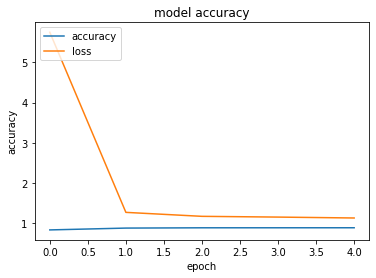

In [31]:
print("Part e")

plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()